# Tugas KTP Cuda - GPU
## Anggota Kelompok
### Fahrel Gibran Alghany - 24060120130106
### Rif'an Fatoni Febrianto - 24060120130073
### M. Fiqih Ikhsan - 24060120140097

# Setup

In [ ]:
import numpy as np
import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
import time

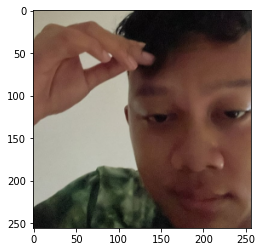

In [ ]:
# Import image
image256 = plt.imread('256.png')
plt.imshow(image256)

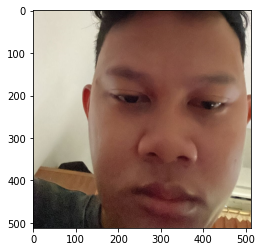

In [ ]:
# Import image
image512 = plt.imread('512.png')
plt.imshow(image512)

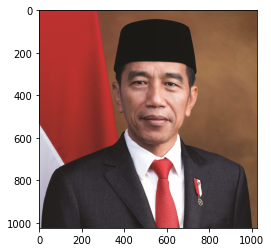

In [ ]:
# Import image
image1024 = plt.imread('1024.png')
plt.imshow(image1024)

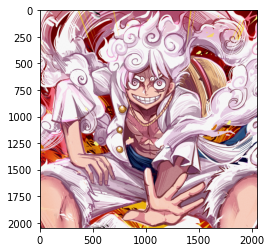

In [ ]:
# Import image
image2048 = plt.imread('2048.png')
plt.imshow(image2048)

# Problem Set 1

In [ ]:
# Create gpu weight for grayscale image
weight_gray_gpu = cp.array([[0.299, 0.587, 0.114]], dtype=cp.float32)

In [ ]:
# Convert image from uint8 to float32
image256 = image256.astype(cp.float32)
image512 = image512.astype(cp.float32)
image1024 = image1024.astype(cp.float32)
image2048 = image2048.astype(cp.float32)

In [ ]:
# Convert image to grayscale with GPU
@cuda.jit
def grayscale_gpu(image, weight, image_gray):
    i, j = cuda.grid(2)
    if i < image.shape[0] and j < image.shape[1]:
        image_gray[i, j] = (weight[0, 0] * image[i, j, 0] + weight[0, 1] * image[i, j, 1] + weight[0, 2] * image[i, j, 2])

### 256x256 Image

In [ ]:
# Setup the threads for 256x256 image
image256_gray = cp.zeros((image256.shape[0], image256.shape[1]), dtype=cp.float32)
threadsperblock = (16, 16)
blockspergrid_x = int(np.ceil(image256.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image256.shape[1] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

Time for 256x256 image: 0.004347562789916992 seconds


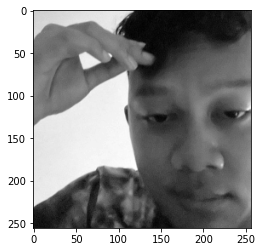

In [ ]:
# Convert image to grayscale and calculate time
start_time = time.time()
grayscale_gpu[blockspergrid, threadsperblock](image256, weight_gray_gpu, image256_gray)
image256_gray_time = time.time() - start_time

print("Time for 256x256 image: %s seconds" % (image256_gray_time))
print("=====================================")
plt.imshow(image256_gray.get(), cmap='gray')

### 512x512 Image

In [ ]:
# Setup the threads for 512x512 image
image512_gray = cp.zeros((image512.shape[0], image512.shape[1]), dtype=cp.float32)
threadsperblock = (16, 16)
blockspergrid_x = int(np.ceil(image512.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image512.shape[1] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

Time for 512x512 image: 0.0069730281829833984 seconds


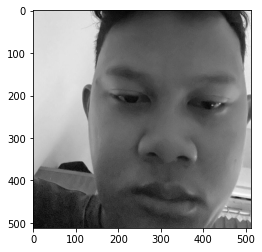

In [ ]:
# Convert image to grayscale and calculate time
start_time = time.time()
grayscale_gpu[blockspergrid, threadsperblock](image512, weight_gray_gpu, image512_gray)
image512_gray_time = time.time() - start_time

print("Time for 512x512 image: %s seconds" % (image512_gray_time))
print("=====================================")
plt.imshow(image512_gray.get(), cmap='gray')

### 1024x1024 Image

In [ ]:
# Setup the threads for 1024x1024 image
image1024_gray = cp.zeros((image1024.shape[0], image1024.shape[1]), dtype=cp.float32)
threadsperblock = (16, 16)
blockspergrid_x = int(np.ceil(image1024.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image1024.shape[1] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

Time for 1024x1024 image: 0.012907266616821289 seconds


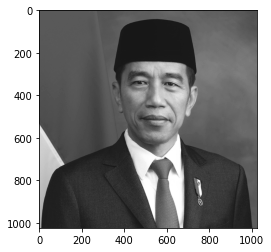

In [ ]:
# Convert image to grayscale and calculate time
start_time = time.time()
grayscale_gpu[blockspergrid, threadsperblock](image1024, weight_gray_gpu, image1024_gray)
image1024_gray_time = time.time() - start_time

print("Time for 1024x1024 image: %s seconds" % (image1024_gray_time))
print("=====================================")
plt.imshow(image1024_gray.get(), cmap='gray')

### 2048x2048 Image

In [ ]:
# Setup the threads for 2048x2048 image
image2048_gray = cp.zeros((image2048.shape[0], image2048.shape[1]), dtype=cp.float32)
threadsperblock = (16, 16)
blockspergrid_x = int(np.ceil(image2048.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image2048.shape[1] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

Time for 2048x2048 image: 0.035546064376831055 seconds


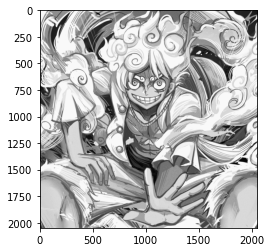

In [ ]:
# Convert image to grayscale and calculate time
start_time = time.time()
grayscale_gpu[blockspergrid, threadsperblock](image2048, weight_gray_gpu, image2048_gray)
image2048_gray_time = time.time() - start_time

print("Time for 2048x2048 image: %s seconds" % (image2048_gray_time))
print("=====================================")
plt.imshow(image2048_gray.get(), cmap='gray')

In [ ]:
# Create a summary table for CPU
data = {'Image Size': ['256x256', '512x512', '1024x1024', '2048x2048'],
        'GPU Time (s)': [image256_gray_time, image512_gray_time, image1024_gray_time, image2048_gray_time]}
df = pd.DataFrame(data)
df

,Image Size,GPU Time (s)
0,256x256,0.004348
1,512x512,0.006973
2,1024x1024,0.012907
3,2048x2048,0.035546


# Problem Set 2

In [ ]:
# Create gpu weight for blurring image
weight_blur_gpu = cp.array([[0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005],
                            [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                            [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                            [0.020, 0.030, 0.035, 0.040, 0.035, 0.030, 0.020],
                            [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                            [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                            [0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005]], dtype=cp.float32)

In [ ]:
# Blur image with GPU
@cuda.jit
def blur_gpu(image, weight, image_blur):
    i, j = cuda.grid(2)
    if i < image.shape[0] and j < image.shape[1]:
        for k in range(image.shape[2]):
            sum = 0
            for m in range(weight.shape[0]):
                for n in range(weight.shape[1]):
                    if i + m - 3 >= 0 and i + m - 3 < image.shape[0] and j + n - 3 >= 0 and j + n - 3 < image.shape[1]:
                        sum += weight[m, n] * image[i + m - 3, j + n - 3, k]
            image_blur[i, j, k] = sum

In [ ]:
# Setup the threads
image256_blur = cp.zeros_like(image256)
threadsperblock = (16, 16, 3)
blockspergrid_x = int(np.ceil(image256.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image256.shape[1] / threadsperblock[1]))
blockspergrid_z = int(np.ceil(image256.shape[2] / threadsperblock[2]))
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

Time for 256x256 image: 0.0259702205657959 seconds


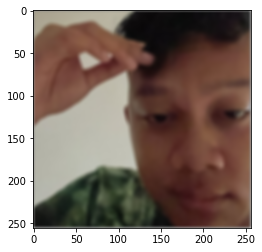

In [ ]:
# Blur the image and calculate time
start_time = time.time()
blur_gpu[blockspergrid, threadsperblock](image256, weight_blur_gpu, image256_blur)
image256_blur_time = time.time() - start_time
print("Time for 256x256 image: %s seconds" % (image256_blur_time))
print("=====================================")
plt.imshow(image256_blur.get())

In [ ]:
# Setup the threads
image512_blur = cp.zeros_like(image512)
threadsperblock = (16, 16, 3)
blockspergrid_x = int(np.ceil(image512.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image512.shape[1] / threadsperblock[1]))
blockspergrid_z = int(np.ceil(image512.shape[2] / threadsperblock[2]))
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

Time for 512x512 image: 0.02633213996887207 seconds


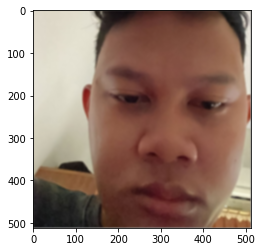

In [ ]:
# Blur the image and calculate time
start_time = time.time()
blur_gpu[blockspergrid, threadsperblock](image512, weight_blur_gpu, image512_blur)
image512_blur_time = time.time() - start_time
print("Time for 512x512 image: %s seconds" % (image512_blur_time))
print("=====================================")
plt.imshow(image512_blur.get())

In [ ]:
# Setup the threads
image1024_blur = cp.zeros_like(image1024)
threadsperblock = (16, 16, 3)
blockspergrid_x = int(np.ceil(image1024.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image1024.shape[1] / threadsperblock[1]))
blockspergrid_z = int(np.ceil(image1024.shape[2] / threadsperblock[2]))
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

Time for 1024x1024 image: 0.07993245124816895 seconds


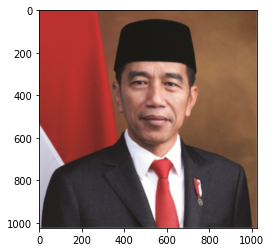

In [ ]:
# Blur the image and calculate time
start_time = time.time()
blur_gpu[blockspergrid, threadsperblock](image1024, weight_blur_gpu, image1024_blur)
image1024_blur_time = time.time() - start_time
print("Time for 1024x1024 image: %s seconds" % (image1024_blur_time))
print("=====================================")
plt.imshow(image1024_blur.get())

In [ ]:
# Setup the threads
image2048_blur = cp.zeros_like(image2048)
threadsperblock = (16, 16, 3)
blockspergrid_x = int(np.ceil(image2048.shape[0] / threadsperblock[0]))
blockspergrid_y = int(np.ceil(image2048.shape[1] / threadsperblock[1]))
blockspergrid_z = int(np.ceil(image2048.shape[2] / threadsperblock[2]))
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

Time for 2048x2048 image: 0.29204368591308594 seconds


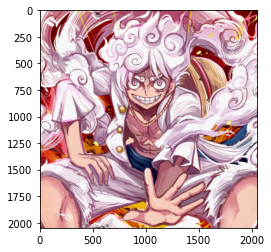

In [ ]:
# Blur the image and calculate time
start_time = time.time()
blur_gpu[blockspergrid, threadsperblock](image2048, weight_blur_gpu, image2048_blur)
image2048_blur_time = time.time() - start_time
print("Time for 2048x2048 image: %s seconds" % (image2048_blur_time))
print("=====================================")
plt.imshow(image2048_blur.get())

In [ ]:
# Create a summary table for CPU
data = {'Image Size': ['256x256', '512x512', '1024x1024', '2048x2048'],
        'GPU Time (s)': [image256_blur_time, image512_blur_time, image1024_blur_time, image2048_blur_time]}
df = pd.DataFrame(data)
df

,Image Size,GPU Time (s)
0,256x256,0.025970
1,512x512,0.026332
2,1024x1024,0.079932
3,2048x2048,0.292044
